<h1><center>Titanic in Production!</center></h1>

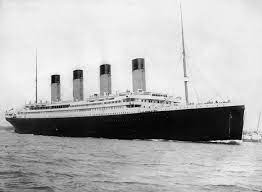

### In this notebook, we explore the datasets that were generated to imitate a "Titanic in production" scenario.

- Recall, the datasets were generated with CTGAN model presented in the paper *Modeling Tabular data using Conditional GAN* by Xu et al.[1]

#### Project setup:
- Consider 10 years of Titanic expeditions where the goal is to predict survival of the Titanic passengers in each of the 10 years
- Over the course of the 10 years, the number of surviving passengers will be increasing (perhaps due to technological advancements in the Titanic manufacturing process)
    - The data generated will be generated based on preprocessed Titanic data (the operations can be found in preprocess.py)
    - The drift in the data is created by simply sampling a fraction of each Titanic dataset and assigning a label of "Survived" to that sample
        - In **Year 1** after the original Titanic, **10%** of the dataset will be sampled and assigned a label of "Survived". Meanwhile, by **Year 10**, **80%** of the generated dataset will be assigned "Survived".
- We'll explore what happens if we only train on the original Titanic dataset vs. if we engage in batch learning to keep the model up to date with the most recent titanic expeditions

[1]: https://arxiv.org/abs/1907.00503

In [1]:
# Importing libraries
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import re

In [2]:
# Read in original titanic data
df_titanic = pd.read_csv('./data/train_preprocessed.csv')

In [3]:
# Read in generated data
path = './data/generated_data/'
generated_files = glob.glob(os.path.join(path , "*.csv"))

# Sort the files so that the order is generated_dataset0, generated_dataset1, generated_dataset2 etc... 
generated_files.sort(key=lambda x: int(re.search(r'\d+', x).group()))

# Load generated datasets into dataframes
generated_datasets = []
for idx, filename in enumerate(generated_files):
    df = pd.read_csv(filename)
    generated_datasets.append(df)

# Exploring features of generated data

## Exploring Age

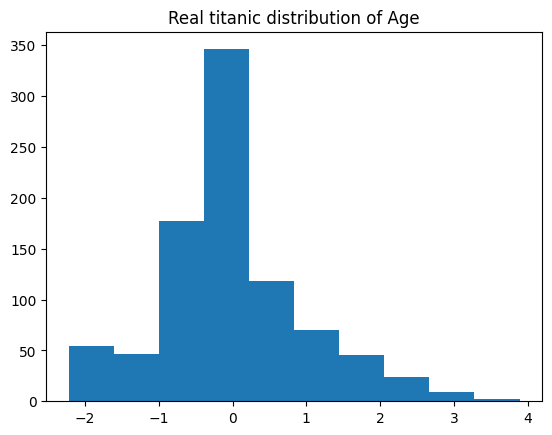

In [7]:
# Plotting the original Titanic Age distribution (after preprocessing)
plt.hist(df_titanic['Age'])
plt.title('Real titanic distribution of Age')
plt.show()

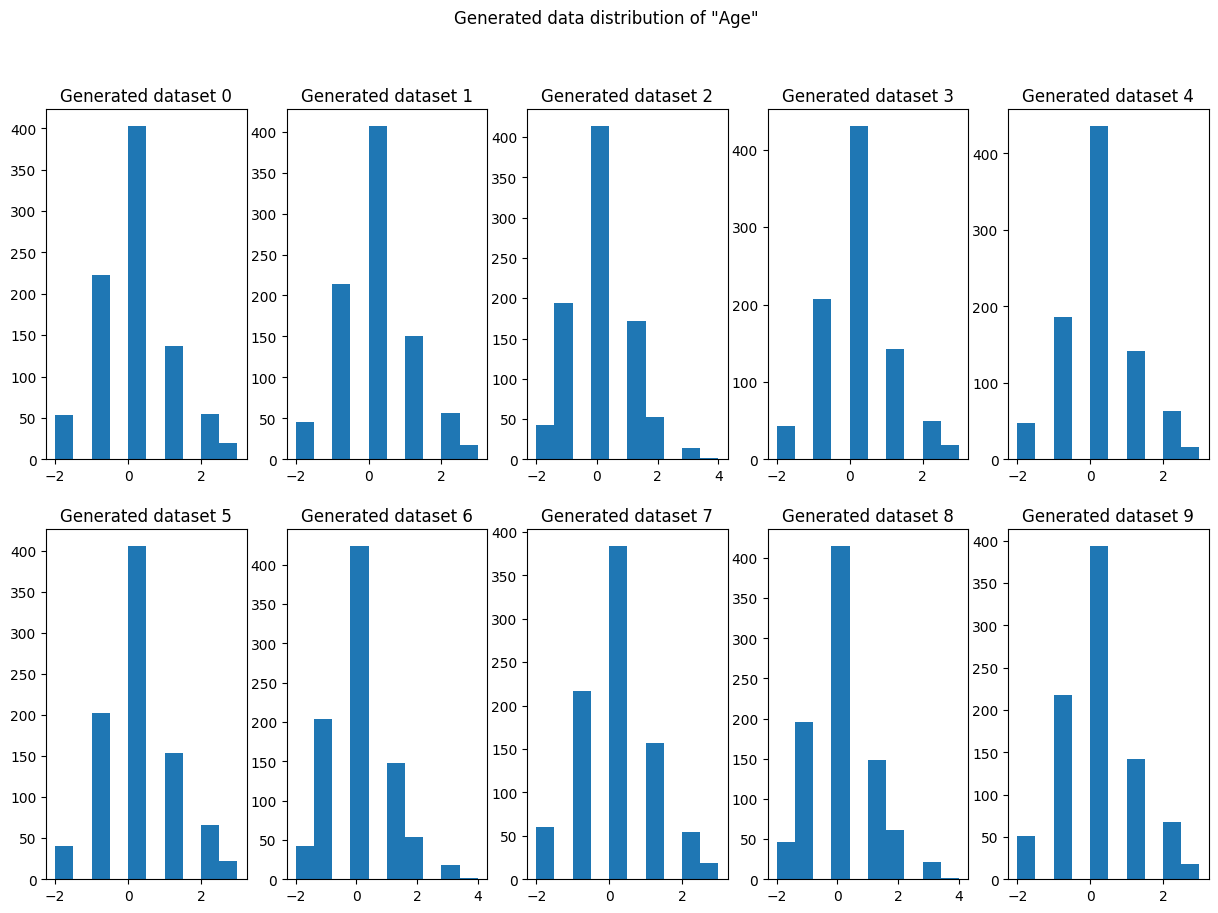

In [6]:
fig, axs = plt.subplots(2,5,figsize=(15, 10))
fig.suptitle('Generated data distribution of \"Age\" ')
c = 0
for idx, generated_dataset in enumerate(generated_datasets):
    axs[c, idx%5].hist(generated_datasets[idx]['Age'])
    axs[c, idx%5].set_title(f'Generated dataset {idx}')
    if idx == 4:
        c += 1

In [57]:
titanic_mean = df_titanic['Age'].mean()
print(titanic_mean)

2.392399783704041e-16


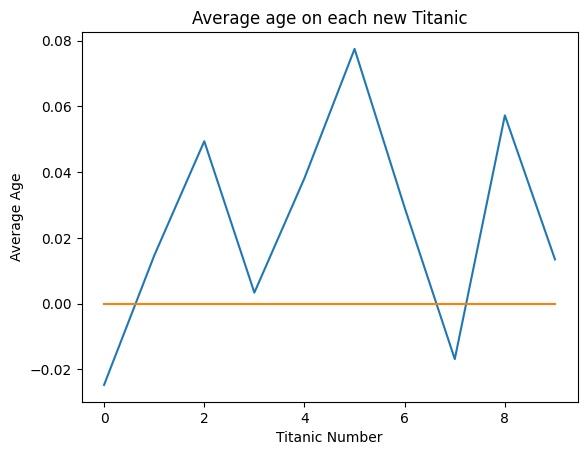

In [60]:
plt.plot([df['Age'].mean() for df in generated_datasets])
plt.plot([titanic_mean for i in range(len(generated_datasets))])
plt.title('Average age on each new Titanic')
plt.xlabel('Titanic Number')
plt.ylabel('Average Age')
plt.show()

## Surival Rates

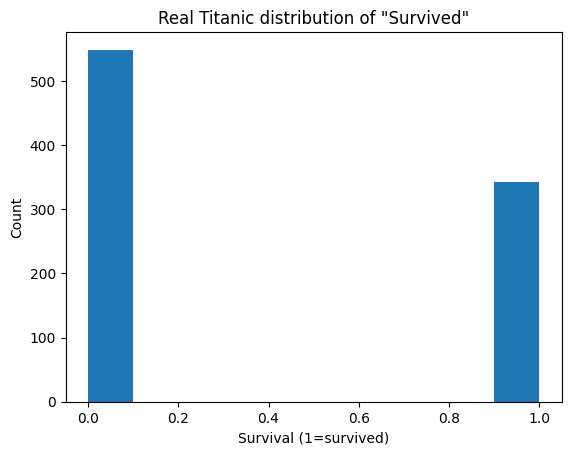

In [14]:
plt.hist(df_titanic['Survived'])
plt.title('Real Titanic distribution of \"Survived\"')
plt.xlabel('Survival (1=survived)')
plt.ylabel('Count')
plt.show()

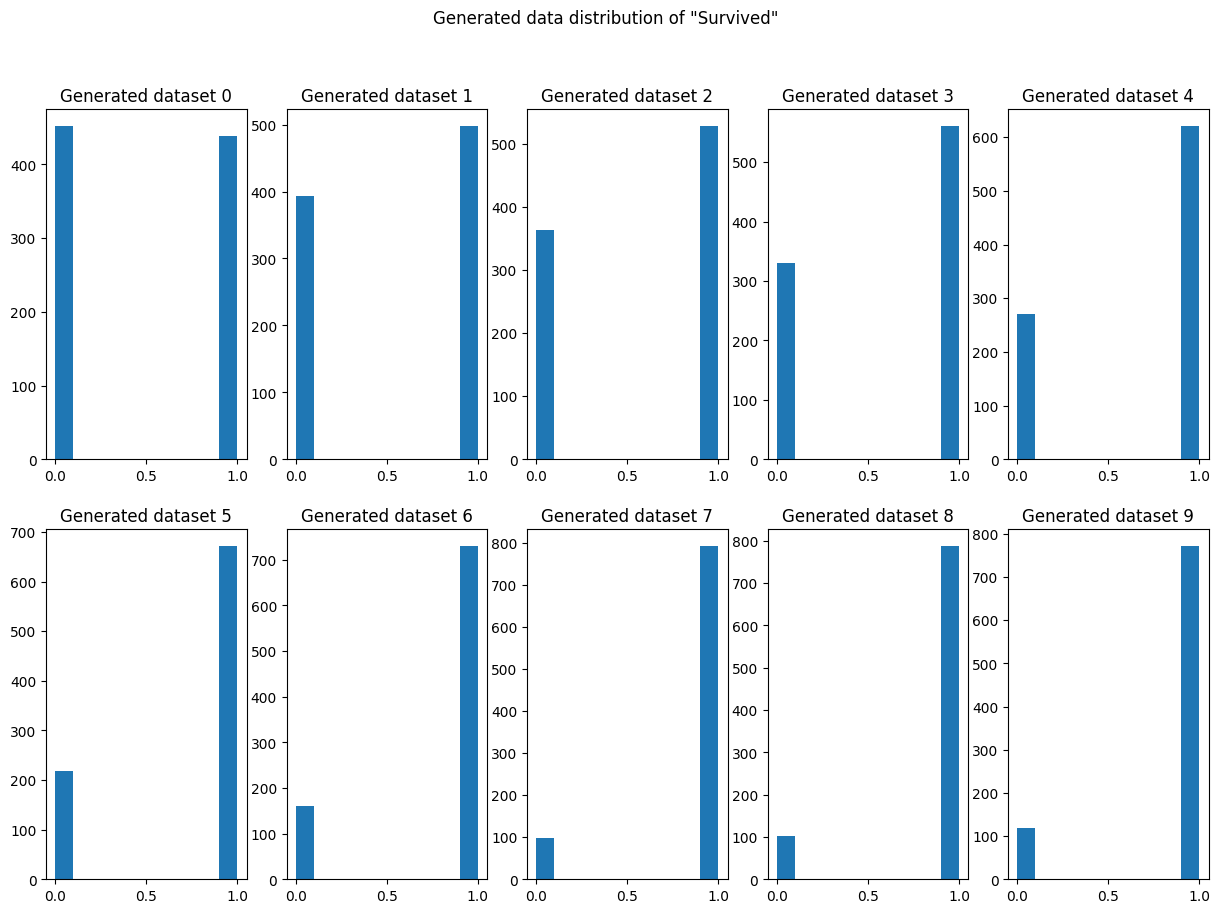

In [10]:
fig, axs = plt.subplots(2,5,figsize=(15, 10))
fig.suptitle('Generated data distribution of \"Survived\" ')
c = 0
for idx, generated_dataset in enumerate(generated_datasets):
    axs[c, idx%5].hist(generated_datasets[idx]['Survived'])
    axs[c, idx%5].set_title(f'Generated dataset {idx}')
    if idx == 4:
        c += 1

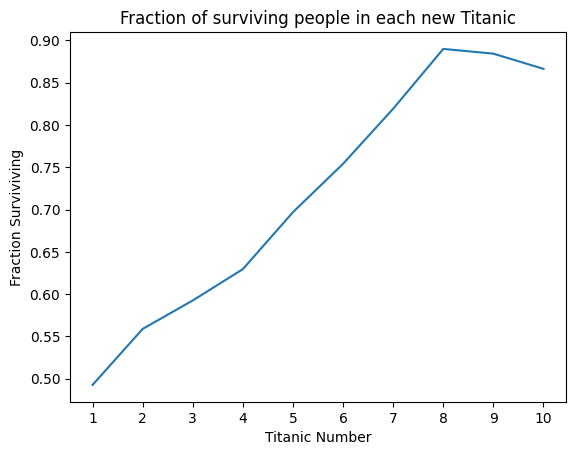

In [16]:
plt.plot(range(1,11), [df['Survived'].sum() / len(df) for df in generated_datasets])
plt.xticks(range(1,11))
plt.title('Fraction of surviving people in each new Titanic')
plt.xlabel('Titanic Number')
plt.ylabel('Fraction Surviviving')
plt.show()

# Evaluating the synthetic data with SDV Quality Report

- Note that we intentionally messed around with the distribution of Survived, so we'll run quality reports without this column.

In [20]:
from sdv.metadata.dataset import Metadata
from sdmetrics.reports.single_table import QualityReport

## Evaluating without column "Survived"

In [51]:
metadata = Metadata()
metadata.add_table(name=None,data=df_titanic.drop(columns=['Survived']))
metadata_dict = metadata.to_dict()

In [54]:
for dataset in generated_datasets:    
    report = QualityReport()
    report.generate(df_titanic.drop(columns=['Survived']), dataset.drop(columns=['Survived']), metadata_dict['tables'][None])

Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 35.05it/s]



Overall Quality Score: 91.12%

Properties:
Column Shapes: 88.45%
Column Pair Trends: 93.79%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34.73it/s]



Overall Quality Score: 90.68%

Properties:
Column Shapes: 87.6%
Column Pair Trends: 93.76%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 35.70it/s]



Overall Quality Score: 90.65%

Properties:
Column Shapes: 87.39%
Column Pair Trends: 93.9%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 33.48it/s]



Overall Quality Score: 90.8%

Properties:
Column Shapes: 87.94%
Column Pair Trends: 93.66%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34.95it/s]



Overall Quality Score: 90.6%

Properties:
Column Shapes: 87.52%
Column Pair Trends: 93.68%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34.88it/s]



Overall Quality Score: 90.47%

Properties:
Column Shapes: 87.09%
Column Pair Trends: 93.85%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 35.52it/s]



Overall Quality Score: 90.37%

Properties:
Column Shapes: 87.4%
Column Pair Trends: 93.34%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34.37it/s]



Overall Quality Score: 90.95%

Properties:
Column Shapes: 88.22%
Column Pair Trends: 93.68%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 34.12it/s]



Overall Quality Score: 90.53%

Properties:
Column Shapes: 87.47%
Column Pair Trends: 93.6%


Creating report: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 33.20it/s]


Overall Quality Score: 90.5%

Properties:
Column Shapes: 87.75%
Column Pair Trends: 93.24%
